### > > > Example notebook < < <
# Structural comparison of connectomes
This is the main script for structural comparisons, which
 - runs a structural and topological comparison of the raw and manipulated connectomes
 - produces visualizations as specified

> **IMPORTANT:** This notebook is just an extension and needs to be connected to the `connectome_manipulator.ipynb` kernel!

INFO: 2 circuits loaded:
  /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build/sonata/circuit_config.json
  /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build_manip/sonata/circuit_config_ConnRewireOrd1KeepIndeg.json
INFO: Preparing "conn_per_layer_EE" plot(s)...
INFO: Loading results from ../working_dir/structural_comparator/circuit-build/data/Raw_conn_per_layer_EE.pickle
INFO: Computing connectivity (group_by=layer, sel_src={'synapse_class': 'EXC'}, sel_dest={'synapse_class': 'EXC'}, N=6x6 groups)


100% |########################################################################|


INFO: Writing resutls to ../working_dir/structural_comparator/circuit-build/data/ConnRewireOrd1KeepIndeg_conn_per_layer_EE.pickle
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build/Raw_vs_ConnRewireOrd1KeepIndeg/struct_comp-conn_per_layer_EE-nsyn_conn.png...


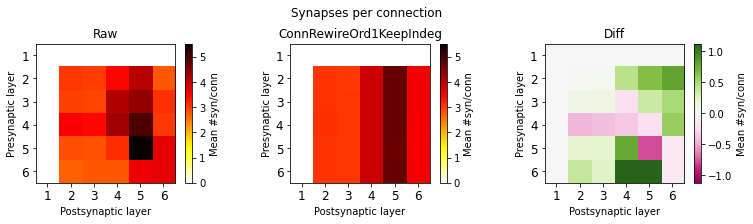

INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build/Raw_vs_ConnRewireOrd1KeepIndeg/struct_comp-conn_per_layer_EE-conn_prob.png...


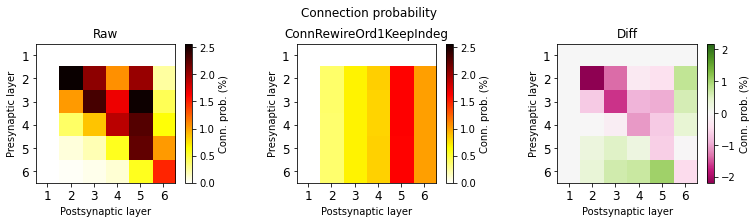

INFO: Preparing "delay_per_layer_EE" plot(s)...
INFO: Loading results from ../working_dir/structural_comparator/circuit-build/data/Raw_delay_per_layer_EE.pickle
INFO: Extracting synapse properties (group_by=layer, sel_src={'synapse_class': 'EXC'}, sel_dest={'synapse_class': 'EXC'}, N=6x6 groups, per_conn=False)
INFO: Available synapse properties: 
['@source_node', '@target_node', 'afferent_center_x', 'afferent_center_y', 'afferent_center_z', 'afferent_section_id', 'afferent_section_pos', 'afferent_section_type', 'afferent_segment_id', 'afferent_segment_offset', 'afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', 'conductance', 'conductance_scale_factor', 'decay_time', 'delay', 'depression_time', 'efferent_center_x', 'efferent_center_y', 'efferent_center_z', 'efferent_section_id', 'efferent_section_pos', 'efferent_section_type', 'efferent_segment_id', 'efferent_segment_offset', 'efferent_surface_x', 'efferent_surface_y', 'efferent_surface_z', 'facilitation_time', 'n_rrp_ve

100% |########################################################################|


INFO: Writing resutls to ../working_dir/structural_comparator/circuit-build/data/ConnRewireOrd1KeepIndeg_delay_per_layer_EE.pickle
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build/Raw_vs_ConnRewireOrd1KeepIndeg/struct_comp-delay_per_layer_EE-delay.png...


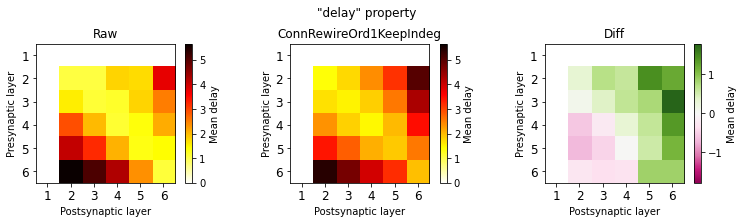

In [8]:
## Structural comparison of connectomes - Configuration
circuit_name = os.path.split(manip_config['circuit_path'])[-1]

structcomp_config = {}

""" General settings """
structcomp_config['working_dir'] = os.path.join('..', 'working_dir', 'structural_comparator', circuit_name)
structcomp_config['out_dir'] = os.path.join('figures', circuit_name)

""" Types of structural plots """
# sel_name = ''
# sel_dict = {}
sel_name = 'EE'
sel_dict = {'sel_src': {'synapse_class': 'EXC'}, 'sel_dest': {'synapse_class': 'EXC'}}
structcomp_config['plot_types'] = [{'name': 'conn_per_layer' + f'{"_" if len(sel_name) > 0 else ""}{sel_name}',
                                    'fct': {'source': 'connectivity', 'kwargs': {'group_by': 'layer', **sel_dict}},
                                    'res_sel': ['nsyn_conn', 'conn_prob'],
                                    'range_prctile': 100,
                                    'fig_size': (11, 3),
                                    'fig_file': {'format': 'png', 'dpi': 600}},
#                                    {'name': 'adjacency' + f'{"_" if len(sel_name) > 0 else ""}{sel_name}',
#                                     'fct': {'source': 'adjacency', 'kwargs': {**sel_dict}},
#                                     'res_sel': ['adj', 'adj_cnt'],
#                                     'range_prctile': 95,
#                                     'fig_size': (11, 3),
#                                     'fig_file': {'format': 'png', 'dpi': 600}},
                                   {'name': 'delay_per_layer' + f'{"_" if len(sel_name) > 0 else ""}{sel_name}',
                                    'fct': {'source': 'properties', 'kwargs': {'group_by': 'layer', **sel_dict, 'fct': 'np.mean'}},
                                    'res_sel': ['delay'],
                                    'range_prctile': 100,
                                    'fig_size': (11, 3),
                                    'fig_file': {'format': 'png', 'dpi': 600}}]

""" Circuits to compare """
structcomp_config['circuits'] = {'0': {'circuit_config': os.path.join(manip_config['circuit_path'], 'sonata', 'circuit_config.json'),
                                       'circuit_name': 'Raw'},
                                 '1': {'circuit_config': os.path.join(manip_config.get('output_path', manip_config['circuit_path']), 'sonata', f'circuit_config_{manip_config["manip"]["name"]}.json'),
                                       'circuit_name': manip_config['manip']['name']}}

# Structural comparison of connectomes - Run comparison
structural_comparator.main(structcomp_config, True, force_recomp=[False, False])